## Titanic Survival Prediction

In [4]:
#Importing all the packages required including classifiers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from xgboost import plot_importance

In [5]:
#Reading in the data
df = pd.read_csv('train.csv')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#Checking types of variables in our dataset
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
#Getting descriptive analysis of our dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
#Checking how many different embarkments in the dataset
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [10]:
#Describing a method that would modify the data as required for analysis
def transform(df0):
    #Filling in the null age values with the mean value since it might be a factor in our analysis
    df0.loc[df0['Age'].isna(), 'Age'] = df0['Age'].mean()
    #Filling in the missing 2 embarked values with mode
    df0.loc[df0['Embarked'].isna(), 'Embarked'] = df0['Embarked'].mode()[0]
    #Dropping the column name 
    df0 = df0.drop(columns = ['Name'])
    #Changing sex and embarked into numeric data
    df0['Sex2'] = df0['Sex'].map({'male': 1, 'female' : 0})
    df0['Embarked2'] = df0['Embarked'].map({'S': 0, 'C' : 1, 'Q' : 2})
    #Filling in the missing Fare values with mean if any
    df0.loc[df0['Fare'].isna(), 'Fare'] = df0['Fare'].mean()
    #Dropping Cabin since there are so many null values and Ticket since they do not have any chararcteristic needed for analysis
    df0 = df0.drop(columns = ['Cabin', 'Ticket'])
    #x = df0.drop(columns = ['PassengerId', 'Sex', 'Embarked'])
    return df0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df0 = df.copy()


In [13]:
df0.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
df0 = transform(df0)

In [15]:
df0.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex2,Embarked2
0,1,0,3,male,22.0,1,0,7.2500,S,1,0
1,2,1,1,female,38.0,1,0,71.2833,C,0,1
2,3,1,3,female,26.0,0,0,7.9250,S,0,0
3,4,1,1,female,35.0,1,0,53.1000,S,0,0
4,5,0,3,male,35.0,0,0,8.0500,S,1,0


In [16]:
df0.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
Sex2             int64
Embarked2        int64
dtype: object

## Visualizations 

In [17]:
df_subset = df0.drop(columns = ['PassengerId', 'Sex', 'Embarked'])
df_subset

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex2,Embarked2
0,0,3,22.000000,1,0,7.2500,1,0
1,1,1,38.000000,1,0,71.2833,0,1
2,1,3,26.000000,0,0,7.9250,0,0
3,1,1,35.000000,1,0,53.1000,0,0
4,0,3,35.000000,0,0,8.0500,1,0
...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,0
887,1,1,19.000000,0,0,30.0000,0,0
888,0,3,29.699118,1,2,23.4500,0,0
889,1,1,26.000000,0,0,30.0000,1,1


Text(0.5, 1.0, 'Survival based on Age')

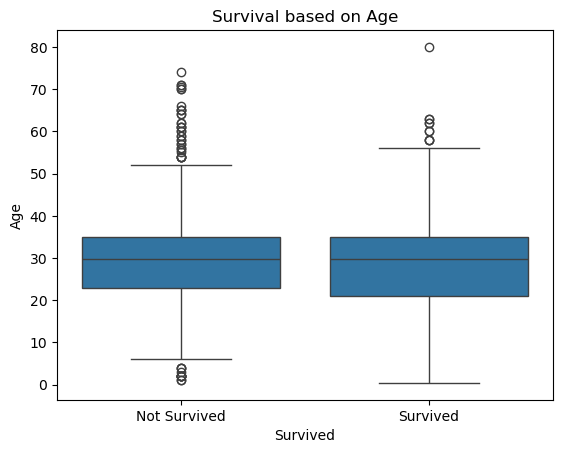

In [18]:
#Boxplot for survival related to age
import matplotlib.pyplot as plt
sns.boxplot(x = df_subset['Survived'], y = df_subset['Age']) 
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.title("Survival based on Age")

##### There do not seem to be a significant difference in survival rate based on age

Text(0.5, 1.0, 'Survival based on Sex')

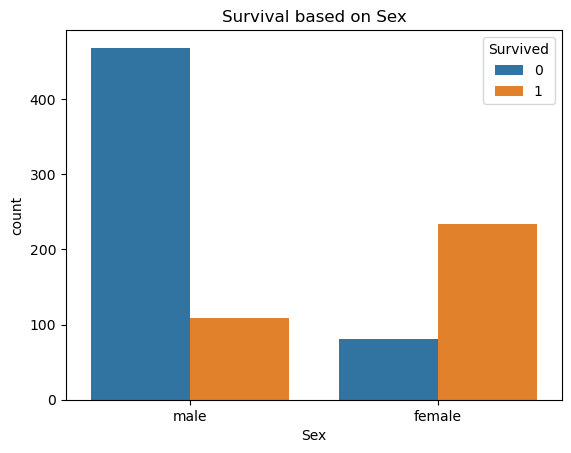

In [19]:
#comparision for sex and survival rate
sns.countplot(x = df['Sex'], hue = df['Survived'])
plt.title("Survival based on Sex")

In [20]:
#Further analysis on sex
print("Percentage of female that survived is:" , round(df[df['Sex'] == 'female']['Survived'].mean()*100, 2))
print("Percentage of male that survived is:" , round(df[df['Sex'] == 'male']['Survived'].mean()*100, 2))

Percentage of female that survived is: 74.2
Percentage of male that survived is: 18.89


##### As we can see, sex seems to be a very significant factor in the survival rate. Female had survival rate of 74.2% whereas men only had 18.89% survival

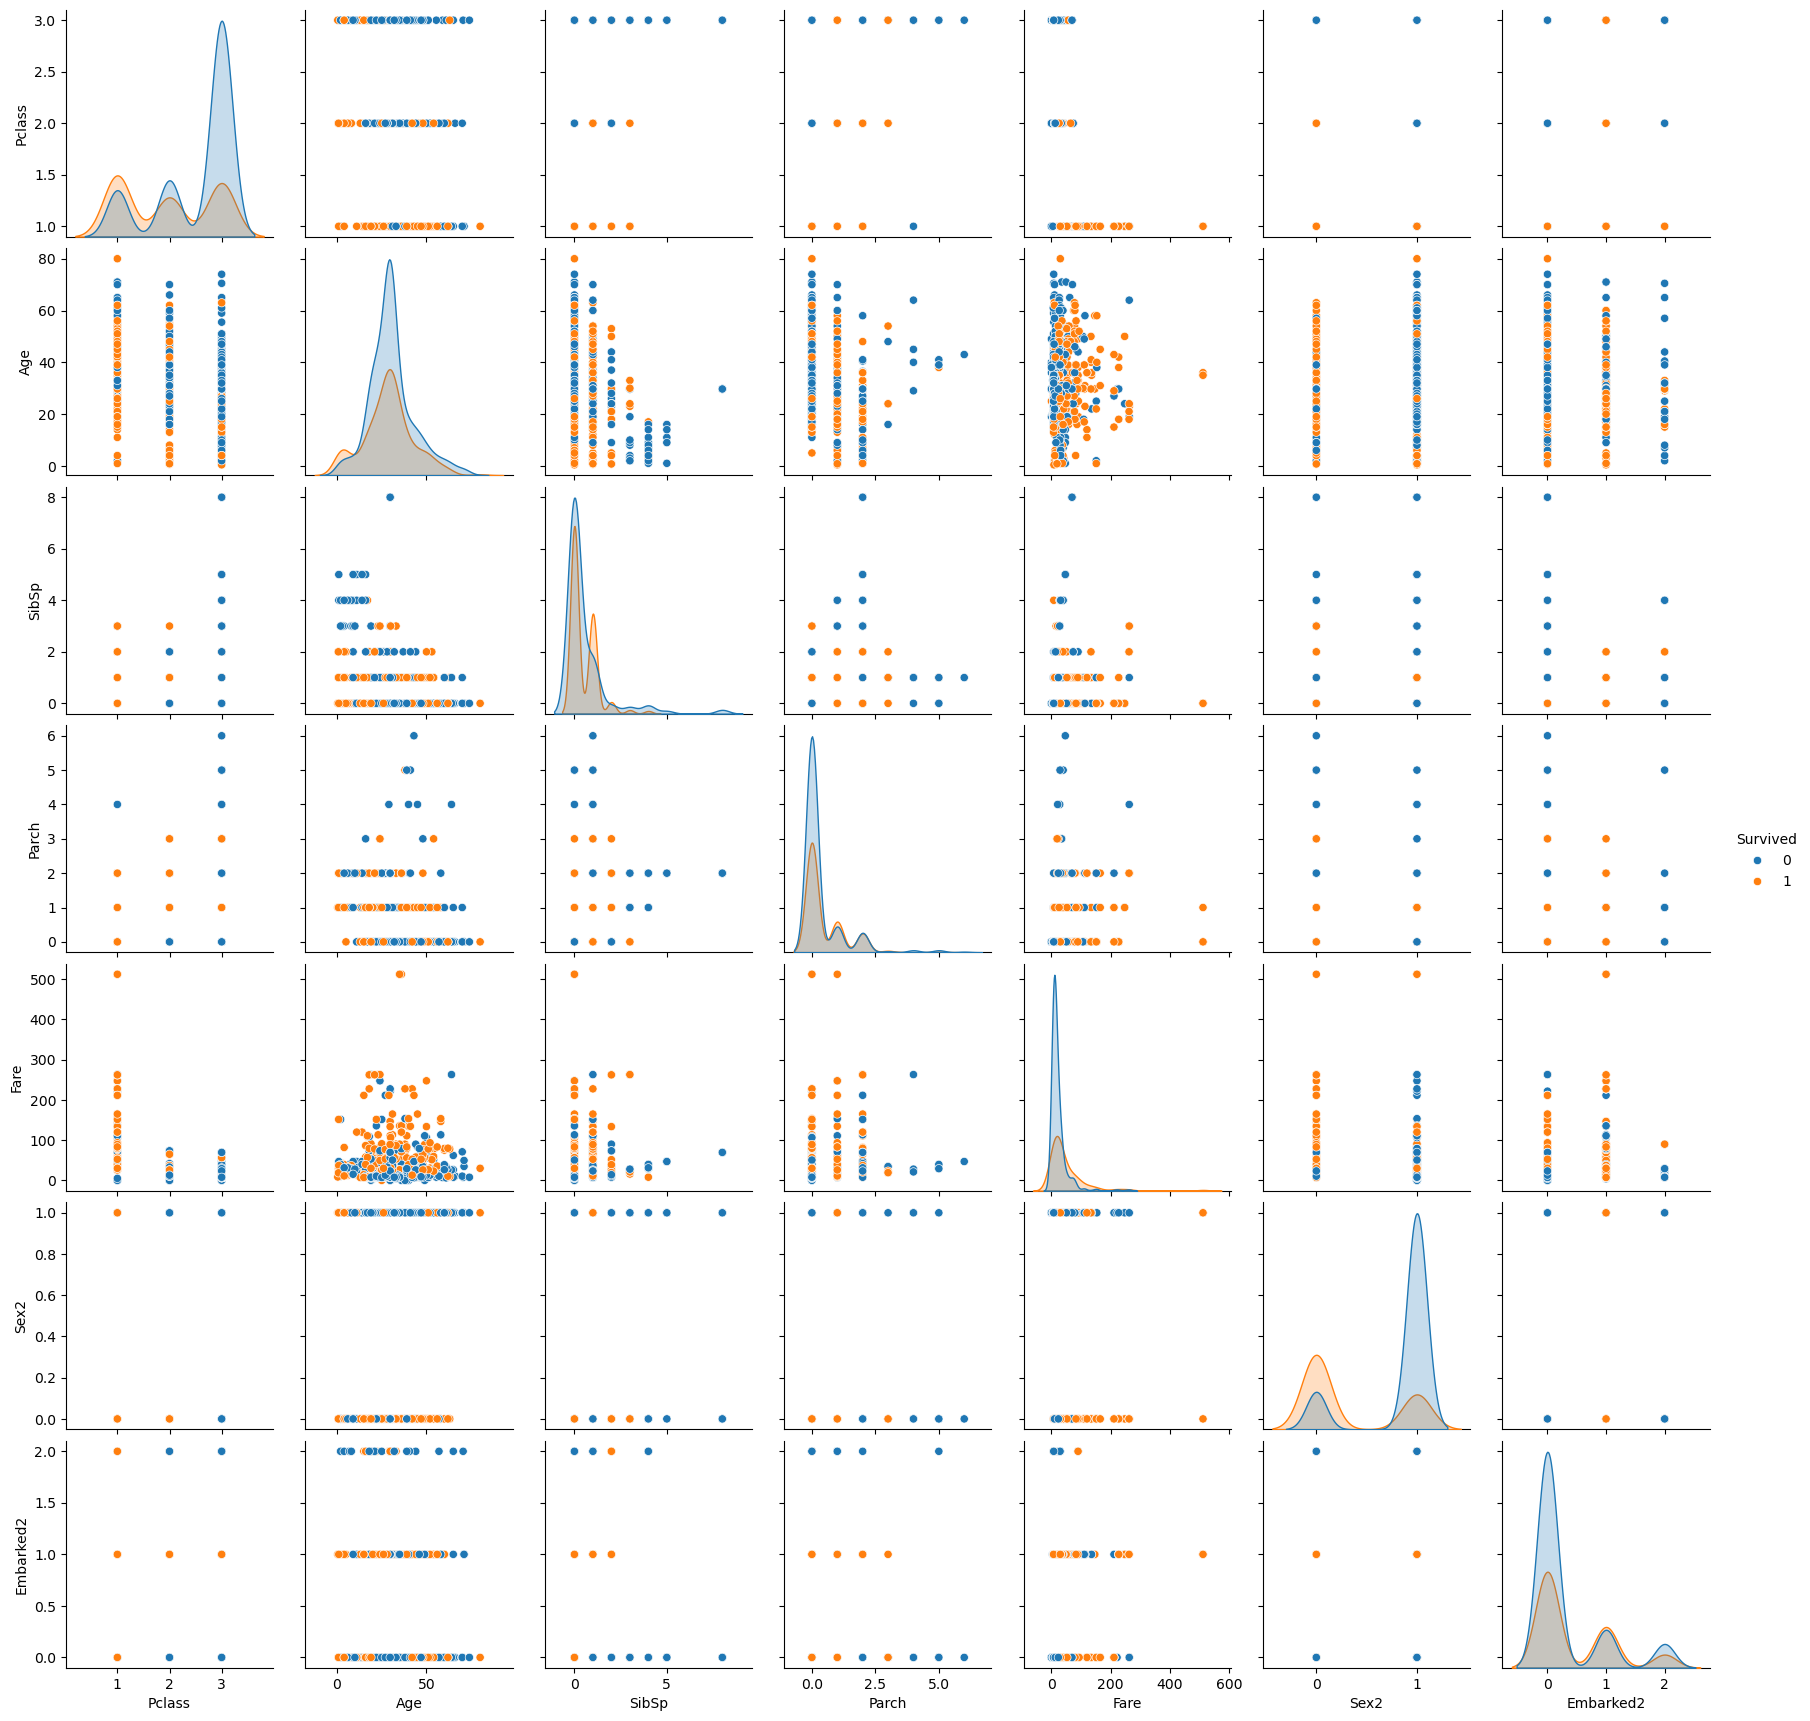

In [21]:
#Scatterplots of the data set with survival as hue
sns.pairplot(df_subset, hue = 'Survived')

##### As seen above, another variable that seems to be significant and in fact the most significant is PClass with high survival rate for certain class, followed by embarkment

<Axes: >

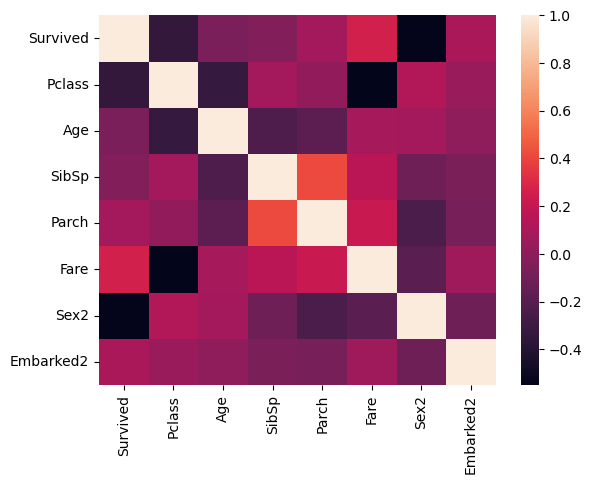

In [22]:
#Heatmap to check for correlation
sns.heatmap(df_subset.corr())

In [23]:
#Partitioning the data in target variable and predictor variables
y = df0['Survived']
x = df0.drop(columns = ['PassengerId','Survived', 'Sex', 'Embarked', 'Fare', 'Age'])

Parch and SibSp seem to have the strongest correlation among all the variables

In [24]:
#Splitting the dataset into train and test for further analysis
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 42)

In [25]:
# Creating a method that would help combine the results of the classifiers at the end to find the best
def get_test_result (model, y_pred, y_test):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division = 1)
    recall = recall_score(y_test, y_pred, zero_division = 1)
    f1 = f1_score(y_test, y_pred, zero_division = 1)
    table = pd.DataFrame({'Model' : [model],
                          'F1 score' : [f1],
                          'Recall score': [recall],
                          'Precision score' : [precision], 
                          'Accuracy score' : [accuracy]
                         })
    return table
                        

In [26]:
#Logistic Regression
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
y_pred = logmodel.predict(x_test)


In [27]:
results = get_test_result("Logistic Reg", y_pred, y_test)
results

,Model,F1 score,Recall score,Precision score,Accuracy score
0,Logistic Reg,0.703125,0.652174,0.762712,0.787709


In [28]:
#Random Forest Classifier
rf = RandomForestClassifier(random_state = 42)
cv_params = {'max_depth' : [2, 6, 10, None], 
            'min_samples_leaf' : [1, 2, 3], 
            'min_samples_split' : [2, 6, 10], 
            'n_estimators': [50, 100, 200], 
            'max_features' : ['sqrt', 'log2']}
scoring = ['accuracy', 'precision', 'recall', 'f1']
rf_gd = GridSearchCV(rf, cv_params, scoring = scoring, refit = 'f1', cv = 5)

In [ ]:
%%time
rf_gd.fit(x_train, y_train)

In [ ]:
rf_gd.best_score_

0.7080514907568008

In [ ]:
#Best coefficients that resulted in the best score
rf_gd.best_estimator_

RandomForestClassifier(max_depth=2, random_state=42)

In [ ]:
y_pred = rf_gd.best_estimator_.predict(x_test)
results = pd.concat([results, get_test_result("Random Forest Class", y_pred, y_test)])
results

,Model,F1 score,Recall score,Precision score,Accuracy score
0,Logistic Reg,0.703125,0.652174,0.762712,0.787709
0,Random Forest Class,0.689655,0.579710,0.851064,0.798883


In [ ]:
#XGBoost Classifier
xgb = XGBClassifier(objective = 'binary:logistic')
cv_params = {'max_depth' : [2, 6, 10], 
            'min_child_weight' : [2, 4, 10], 
            'n_estimators' : [100, 200, 300], 
            'learning_rate' : [0.01, 0.1]
            }
xgb_gd = GridSearchCV(xgb, cv_params, scoring = scoring, refit = 'f1')

In [ ]:
%%time
xgb_gd.fit(x_train, y_train)

CPU times: total: 9min 10s
Wall time: 1min 54s


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     lea...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [2, 6, 10],
                         'min_child_weight': [2, 4, 10],
                         'n_estimators': [100, 200, 300]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [ ]:
y_pred = xgb_gd.predict(x_test)
results = pd.concat([results, get_test_result("XGBoost", y_pred, y_test)])
results

,Model,F1 score,Recall score,Precision score,Accuracy score
0,Logistic Reg,0.703125,0.652174,0.762712,0.787709
0,Random Forest Class,0.689655,0.579710,0.851064,0.798883
0,XGBoost,0.688525,0.608696,0.792453,0.787709


In [ ]:
plot_importance(xgb_gd.best_estimator_)

NameError: name 'plot_importance' is not defined

In [ ]:
bayes = GaussianNB()
bayes.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred = bayes.predict(x_test)
results = pd.concat([results, get_test_result("Naive Bayes", y_pred, y_test)])
results

,Model,F1 score,Recall score,Precision score,Accuracy score
0,Logistic Reg,0.703125,0.652174,0.762712,0.787709
0,Random Forest Class,0.689655,0.579710,0.851064,0.798883
0,XGBoost,0.688525,0.608696,0.792453,0.787709
0,Naive Bayes,0.697674,0.652174,0.750000,0.782123


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(x_test)
results = pd.concat([results, get_test_result("K Nearest Neighbor" , y_pred, y_test)])
results

,Model,F1 score,Recall score,Precision score,Accuracy score
0,Logistic Reg,0.703125,0.652174,0.762712,0.787709
0,Random Forest Class,0.689655,0.579710,0.851064,0.798883
0,XGBoost,0.688525,0.608696,0.792453,0.787709
0,Naive Bayes,0.697674,0.652174,0.750000,0.782123
0,K Nearest Neighbor,0.676259,0.681159,0.671429,0.748603


In [ ]:
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [ ]:
y_pred = svc.predict(x_test)
results = pd.concat([results, get_test_result("SVM", y_pred, y_test)])
results

,Model,F1 score,Recall score,Precision score,Accuracy score
0,Logistic Reg,0.703125,0.652174,0.762712,0.787709
0,Random Forest Class,0.689655,0.579710,0.851064,0.798883
0,XGBoost,0.688525,0.608696,0.792453,0.787709
0,Naive Bayes,0.697674,0.652174,0.750000,0.782123
0,K Nearest Neighbor,0.676259,0.681159,0.671429,0.748603
0,SVM,0.720000,0.652174,0.803571,0.804469


##### SVM seems to outperform the other models, hence we will use it for submission.

In [ ]:
test = pd.read_csv('test.csv')
passenger = test['PassengerId']

In [ ]:
test = transform(test)
test = test.drop(columns = ['PassengerId', 'Sex', 'Embarked', 'Fare', 'Age'])

In [ ]:
test

,Pclass,SibSp,Parch,Sex2,Embarked2
0,3,0,0,1,2
1,3,1,0,0,0
2,2,0,0,1,2
3,3,0,0,1,0
4,3,1,1,0,0
...,...,...,...,...,...
413,3,0,0,1,0
414,1,0,0,0,1
415,3,0,0,1,0
416,3,0,0,1,0


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Pclass     418 non-null    int64
 1   SibSp      418 non-null    int64
 2   Parch      418 non-null    int64
 3   Sex2       418 non-null    int64
 4   Embarked2  418 non-null    int64
dtypes: int64(5)
memory usage: 16.5 KB


In [ ]:
output = logmodel.predict(test)
submission = pd.DataFrame({'PassengerId': passenger, "Survived": output})
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
submission.to_csv('submission.csv', index=False)